<a href="https://colab.research.google.com/github/THashiz/titanic/blob/master/kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color: blue; ">Kaggle titanicをcolaboで実行する</span>

----

In [0]:
# google colaboratoryでノートブックを実行する。
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!rm -rf ~/.kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!pip install kaggle

In [0]:
!kaggle competitions download --force -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 11.1MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.16MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 59.6MB/s]


In [0]:
# 場合により解凍する
#!unzip /content/train.csv.zip
#!unzip /content/test.csv.zip

In [0]:
# google colaboratoryに無いライブラリをインストール
!apt-get update
!apt-get install r-base
!apt-get install python-pydot -y --allow-unauthenticated

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [88.1 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRele

In [0]:
# ライブラリのロード
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import io


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


----
# 2. データの中身を知る

まず分析するデータがどんなものか確認してみよう

In [0]:
# ローカルのファイルをロード
data = pd.read_csv('/content/train.csv')

In [0]:
# データの先頭を表示
data.head()
#PassengerID:　乗客ID
#Survived: 　　生存結果 (1: 生存, 2: 死亡)　
#Pclass: 　　　乗客の階級 1が一番位が高いそう
#Name: 　　 　乗客の名前
#Sex: 　　　　 性別
#Age: 　　　　 年齢
#SibSp 　　 　 兄弟、配偶者の数。
#Parch 　　　　両親、子供の数。
#Ticket 　　　 チケット番号。
#Fare 　　　　 乗船料金。
#Cabin 　　　　部屋番号
#Embarked 　　 乗船した港　Cherbourg、Queenstown、Southamptonの３種類

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


----
### 2-2. データ列の要約統計量（平均、標準偏差など）を取得

要約統計量とは標本の分布の特徴を代表的に（要約して）表す統計学上の値であり、統計量の一種  

<span style="color: blue; ">count </span>そのカラムの件数  
<span style="color: blue; ">mean  </span>平均  
<span style="color: blue; ">std   </span>標準偏差  
<span style="color: blue; ">min   </span>最小値  
<span style="color: blue; ">25%   </span>第一四分位数  
<span style="color: blue; ">50%   </span>第二四分位数  
<span style="color: blue; ">75%   </span>第三四分位数  
<span style="color: blue; ">max   </span>最大値  

In [0]:
# pandasのdescribe
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
# 乗船者リストには欠損値(年齢がわからないなど)が存在するため欠損値を除外する。
#data_ti = data.dropna()
data["Age"].fillna(data.Age.median(), inplace=True)
data_ti = data.drop(['Fare','Cabin','Embarked'], axis=1)

In [0]:
#サンプルサイズの確認、比較(元, 欠損値を除外)
len(data), len(data_ti)

(891, 891)

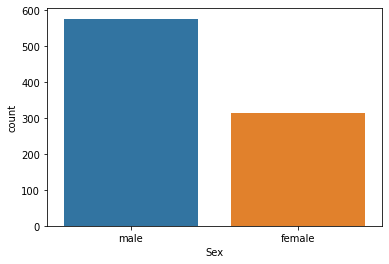

In [0]:
%matplotlib inline
sns.countplot(x='Sex', data=data_ti)
plt.show()

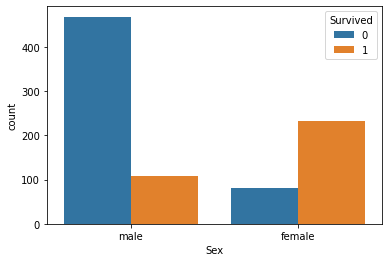

In [0]:
%matplotlib inline
sns.countplot(x='Sex',hue='Survived', data=data_ti)
plt.show()

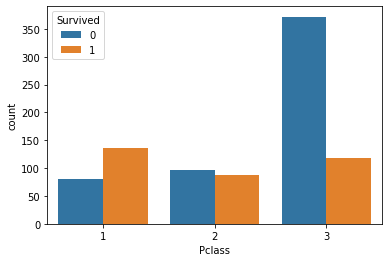

In [0]:
%matplotlib inline
sns.countplot(x='Pclass',hue='Survived', data=data_ti)
plt.show()

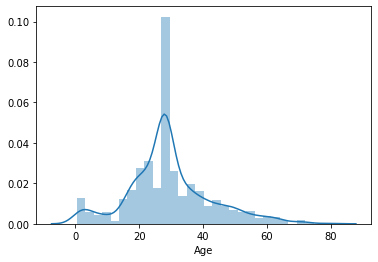

In [0]:
# 年齢ごとの乗船者数
sns.distplot(data_ti['Age'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


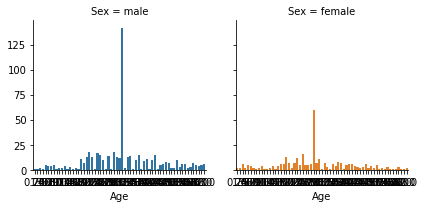

In [0]:
# 年齢ごとの乗船者数(男女別)
grid = sns.FacetGrid(data_ti, col="Sex", hue="Sex")
grid.map(sns.countplot, 'Age')

In [0]:
# 年代ごとのラベルを設定
data_ti.loc[:,'Agecut']=pd.cut(data_ti['Age'], labels=["Baby", "Child", "Youth", "Adult", "Old"], bins=[float("-Inf"), 1, 12, 18, 58, float("Inf")])

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


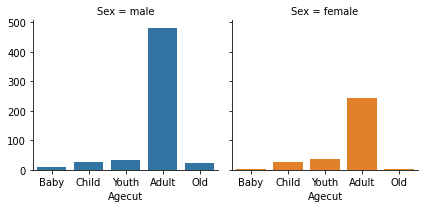

In [0]:
# 性別 x 年代ごとの乗船者数
grid = sns.FacetGrid(data_ti, col="Sex", hue="Sex")
grid.map(sns.countplot, 'Agecut')

In [0]:
import pandas
import sklearn.model_selection

# データの20%をテストに、80%を学習に利用する
train, test = sklearn.model_selection.train_test_split(data_ti, test_size=0.2, train_size = 0.8, random_state = 0)

## 4-1.データの正規化を行う

Min-Max normalization  
■目的  

最小値を0、最大値を1とする正規化  
■条件  

最大値と最小値が予め決まっている様な場合には有効な手法  
データとして外れ値が存在していないこと(これがあると、とんでもない最大値や最小値にひっぱられてしまうため、うまく正規化できない)  
データの分布が一様分布であること  


In [0]:
from sklearn.preprocessing import LabelEncoder

#sklearnにおけるデータの変換を行う機能
#fit：変換式を計算する
#transform：変換式を使ってデータを変換
#fit_transform：上記２つをまとめて実行

train_encoded=train.apply(LabelEncoder().fit_transform)
test_encoded=test.apply(LabelEncoder().fit_transform)

### 4-1-1. データを確認

In [0]:
train_encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Agecut
140,119,0,2,81,0,34,0,2,171,0
439,355,0,1,364,1,39,0,0,451,0
817,651,0,1,410,1,39,1,1,515,0
378,306,0,2,69,1,24,0,0,156,0
491,399,0,2,695,1,26,0,0,537,0


### 4-1-2. データが欠損していないか確認する

各カラムにNULLが存在しているかチェック

In [0]:
train_encoded.isnull().sum(axis=0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Agecut         0
dtype: int64

各カラム0、NULL値は存在しない

----
## 4-2. 学習する

決定木にて学習してみる。

In [0]:
from sklearn.tree import DecisionTreeClassifier

# 説明変数を定義
X=train_encoded.loc[ : , ['Pclass','Sex','Agecut']]

# 目的変数を定義
y=train_encoded['Survived']

# 決定木モデルに説明変数と目的変数を与えモデルを作成する。
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

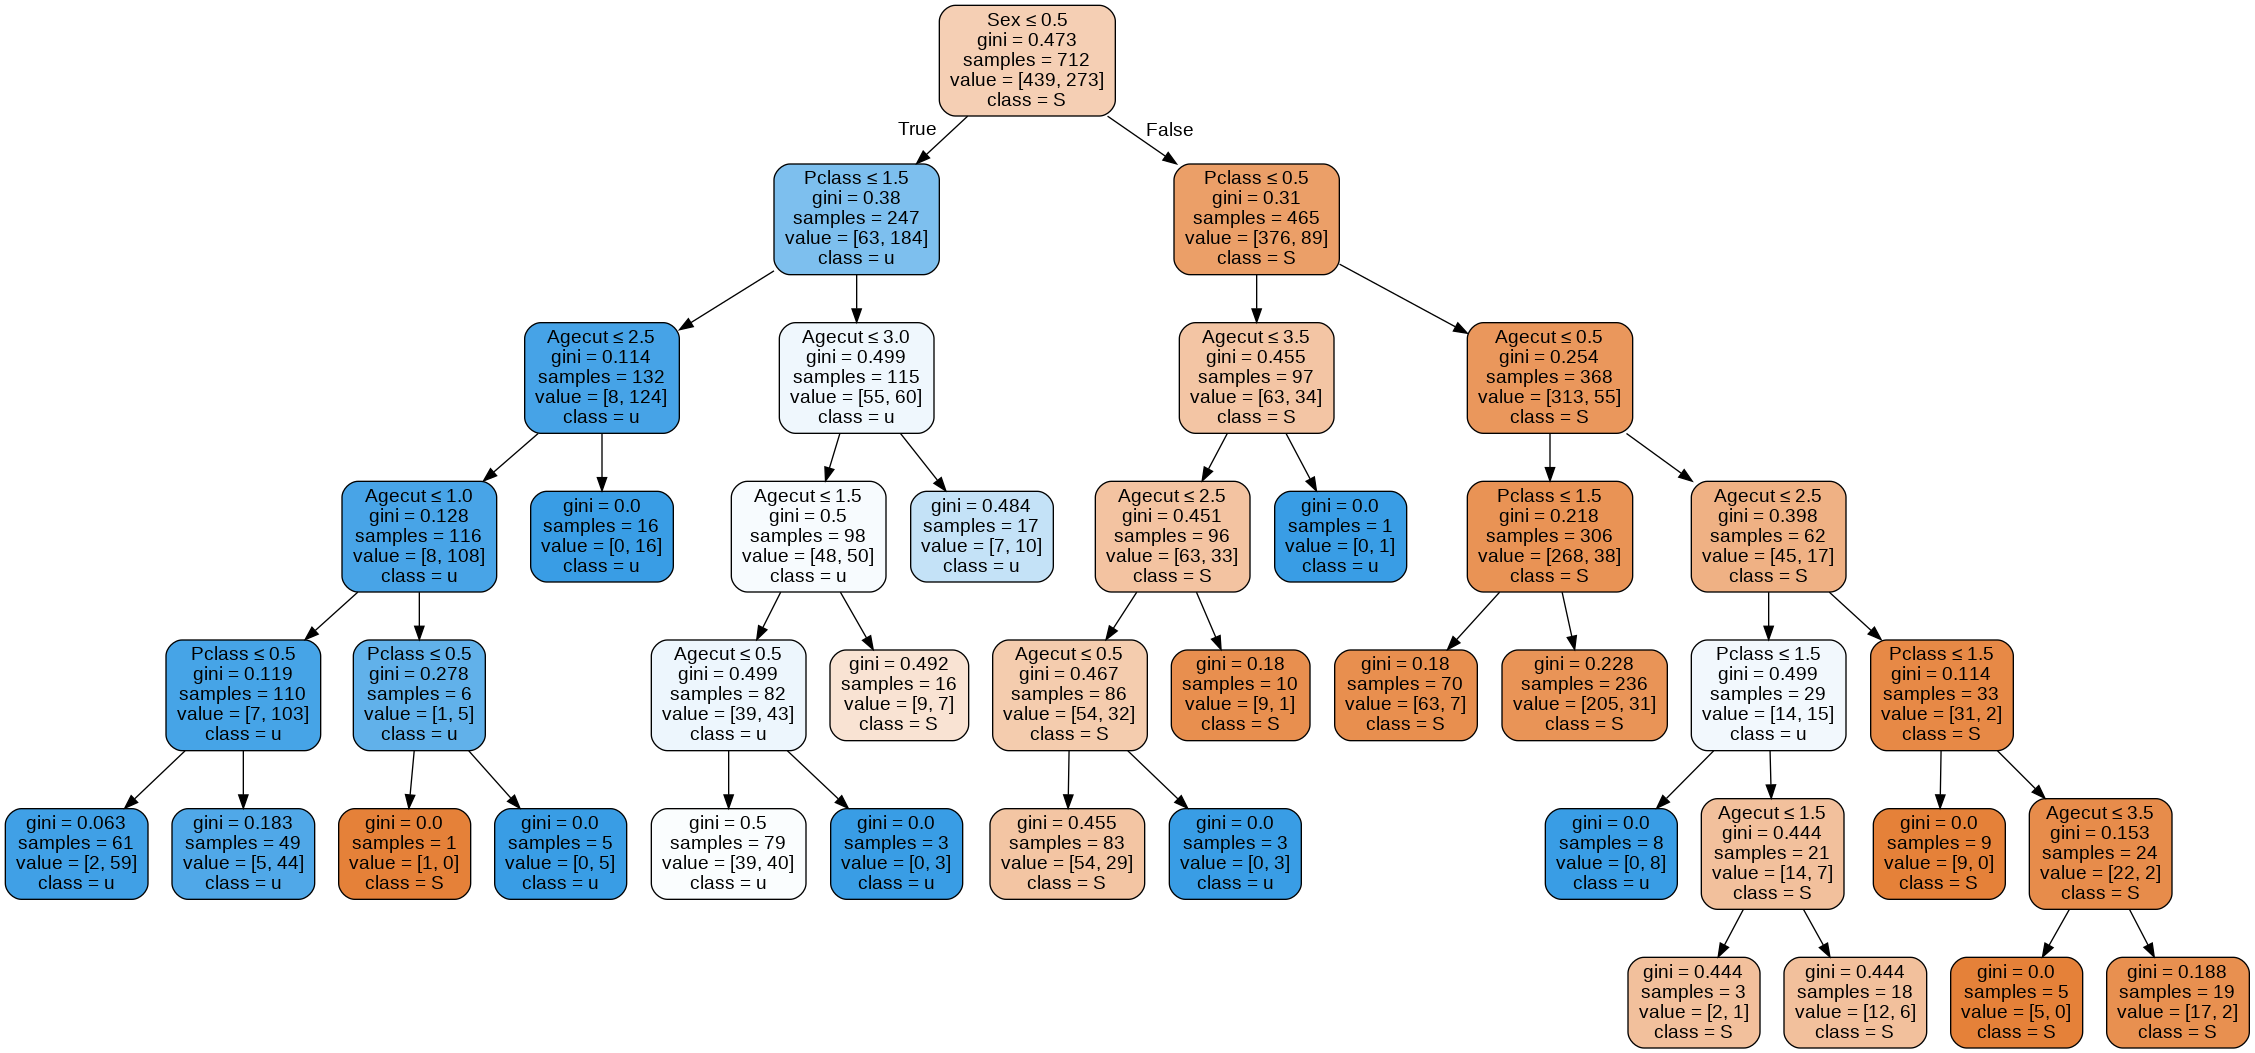

In [0]:
# 学習結果をプロットする
from sklearn import tree
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=['Pclass','Sex','Agecut'],
                                class_names='Survived',
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  


## 4-3. 作成したモデルを用いて予測してみる

In [0]:
# モデルにtestデータを与え予測してみる。
pred = dt.predict(test_encoded.loc[:, ['Pclass','Sex','Agecut']])

### 4-3-1. 予測の結果についてconfusion matrixを作成

混同行列（Confusion Matrix）とは、クラス分類の結果をまとめた表のことです。 陽性のサンプルのうち、何個が正しく陽性と判定され、何個が誤って陰性と判定されたか、といったことを分かりやすくまとめるために用います。 クロス表の一種です。

In [0]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [0]:
def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    plt.figure(figsize = (10,7))
    sn.heatmap(df_cmx, annot=True)
    plt.show()

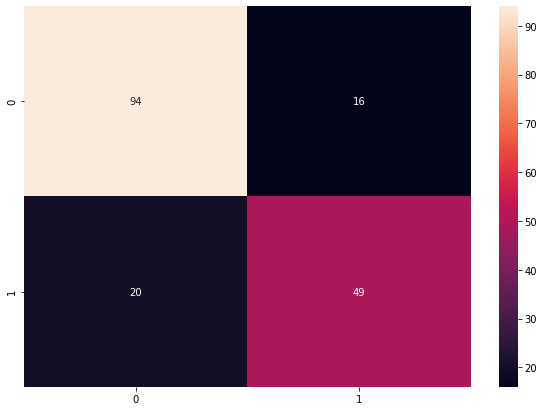

In [0]:
print_cmx(test_encoded.Survived, pred)

表の見方

Y軸 実際にそうであった  
X軸 予測された  
0:0 死亡人数の正解  
0:1 6人を生存と予測  
1:0 27人を死亡と予測  
1:1 生存人数の正解  

In [0]:
# 正解率
from sklearn.metrics import accuracy_score
accuracy_score(test_encoded.Survived, pred)

0.7988826815642458

#ランダムフォレスト

In [0]:
from sklearn.ensemble import RandomForestClassifier

# 説明変数を定義
X=train_encoded.loc[ : , ['Pclass','Sex','Agecut', 'SibSp','Parch', 'Ticket' ]]

# 目的変数を定義
y=train_encoded['Survived']

# モデルに説明変数と目的変数を与えモデルを作成する。
forest = RandomForestClassifier(n_estimators = 100)

# 学習
forest.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# モデルにtestデータを与え予測してみる。
pred = forest.predict(test_encoded.loc[ : , ['Pclass','Sex','Agecut', 'SibSp','Parch', 'Ticket' ]])

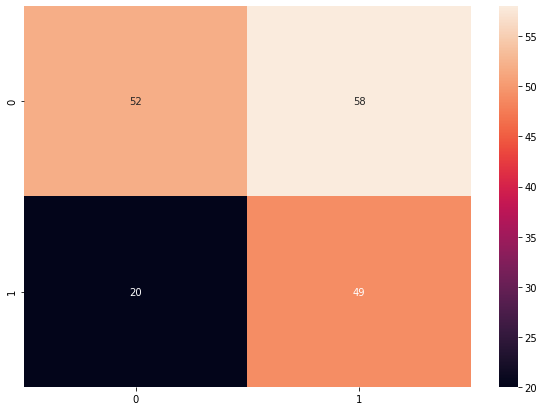

In [0]:
# Confusion Matrix
print_cmx(test_encoded.Survived, pred)

In [0]:
# 正解率
accuracy_score(test_encoded.Survived, pred)

0.5642458100558659

In [0]:
# titanic test.csvの読み込み
test_data = pd.read_csv('/content/test.csv')

test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
# nullチェック
test_data.isnull().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from sklearn.preprocessing import LabelEncoder

# 欠損値の補完
test_data["Age"].fillna(data_ti.Age.median(), inplace=True)

# 年代の設定
test_data.loc[:,'Agecut']=pd.cut(test_data['Age'], labels=["Baby", "Child", "Youth", "Adult", "Old"], bins=[float("-Inf"), 1, 12, 18, 58, float("Inf")])


In [0]:
# nullチェック
test_data.isnull().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Agecut           0
dtype: int64

In [0]:
# 正規化
encoded=test_data.drop(['Fare','Cabin'], axis=1).apply(LabelEncoder().fit_transform)

In [0]:
encoded.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Agecut
0,0,2,206,1,44,0,0,152,1,0
1,1,2,403,0,60,1,0,221,2,0
2,2,1,269,1,74,0,0,73,1,3
3,3,2,408,1,34,0,0,147,2,0
4,4,2,178,0,27,1,1,138,2,0


In [0]:
xs_test=encoded.loc[ : , ['Pclass','Sex','Agecut', 'SibSp','Parch', 'Ticket' ]]

# Rundam Forest
output = forest.predict(xs_test)


In [0]:
print(len(test_data['PassengerId']), len(output))

zip_data = zip(test_data['PassengerId'].astype(int), output.astype(int))

predict_data = list(zip_data)

418 418


In [0]:
import csv
with open("predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data['PassengerId'].astype(int), output.astype(int)):
        writer.writerow([pid, survived])

In [0]:
# submit the file to kaggle
#!kaggle competitions submit titanic -f predict_result_data.csv -m "RandomForestClassifier pclass, age, agecut"

In [0]:
#!kaggle competitions submit -c titanic -f predict_result_data.csv -m "DecisionTreeClassifier pclass, age, agecut"
